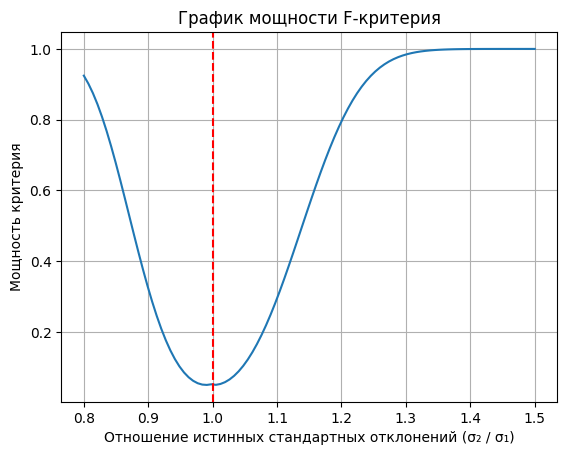

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f, ncf

# Параметры задачи
n1 = 139  # Размер выборки египтян
n2 = 1000 # Размер выборки европейцев
alpha = 0.05  # Уровень значимости

# Критические значения
df1 = n2 - 1  # Степени свободы для большего отклонения (европейцы)
df2 = n1 - 1  # Степени свободы для меньшего отклонения (египтяне)
f_crit_right = f.ppf(1 - alpha / 2, df1, df2)
f_crit_left = f.ppf(alpha / 2, df1, df2)

# Диапазон отношений стандартных отклонений
sigma_ratio = np.linspace(0.8, 1.5, 100)  # От 0.8 до 1.5

# Вычисление мощности
power = []
for ratio in sigma_ratio:
    # Вычисление нецентрального параметра
    # Если s2>s1, то используем
    # delta = (n2 - 1) * ((ratio)**2 - 1)
    # если s2 < s1, то меняем местами размер выборки и отношение стандартных отклонений
    if ratio >= 1:
        delta = (n2 - 1) * (ratio**2 - 1)
        power_val = 1 - ncf.cdf(f_crit_right, df1, df2, delta) + ncf.cdf(f_crit_left, df1, df2, delta)
    else:
       delta = (n1 - 1) * (1/(ratio**2) - 1)
       power_val = 1 - ncf.cdf(f_crit_right, df2, df1, delta) + ncf.cdf(f_crit_left, df2, df1, delta)

    power.append(power_val)

# Построение графика
plt.plot(sigma_ratio, power)
plt.xlabel('Отношение истинных стандартных отклонений (σ₂ / σ₁)')
plt.ylabel('Мощность критерия')
plt.title('График мощности F-критерия')
plt.axvline(x=1, color='r', linestyle='--') # Вертикальная линия для соотношения 1
plt.grid(True)
plt.show()